<a href="https://colab.research.google.com/github/dheerajkumar1a1a/Kaggle_github/blob/main/temp_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import xarray as xr
import pandas as pd
import zipfile

In [3]:
zip_ref=zipfile.ZipFile('/content/copernicus.zip','r')
zip_ref.extractall('/content/')
zip_ref.close()

BadZipFile: ignored

In [ ]:

ds = xr.open_dataset('CRU_minimum_temperature_mon_1x1_global_2019_v4.03.nc')
df = ds.to_dataframe()


In [ ]:
df.isnull().sum()

tasmin    569520
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 777600 entries, (Timestamp('2019-01-01 00:00:00'), -179.5, -89.5) to (Timestamp('2019-12-01 00:00:00'), 179.5, 89.5)
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   tasmin  208080 non-null  float32
dtypes: float32(1)
memory usage: 6.7 MB


In [ ]:
df.to_csv('new.csv')

In [ ]:
df1=pd.read_csv('new.csv')
df1.iloc[111175:,].head(10)

,time,lon,lat,tasmin
111175,2019-02-01,77.5,25.5,10.625001
111176,2019-02-01,77.5,26.5,10.425000
111177,2019-02-01,77.5,27.5,10.300000
111178,2019-02-01,77.5,28.5,10.125000
111179,2019-02-01,77.5,29.5,9.425001
111180,2019-02-01,77.5,30.5,7.350000
111181,2019-02-01,77.5,31.5,-1.475000
111182,2019-02-01,77.5,32.5,-13.525000
111183,2019-02-01,77.5,33.5,-16.475000
111184,2019-02-01,77.5,34.5,-16.775000


In [ ]:
data_catg=['minimum','mean','maximum']
data_repres=['tasmin','tas','tasmax']

In [ ]:
l_df=[]
for typ in range(3):
  l_min=[]
  for y in range(2010,2020):
    year=str(y)
    ds = xr.open_dataset('CRU_'+data_catg[typ]+'_temperature_mon_1x1_global_'+year+'_v4.03.nc')
    df = ds.to_dataframe()
    df.to_csv('new.csv')
    df1=pd.read_csv('new.csv')
    for i in range(46381,823981,64800):
      x=df1.iloc[i,][data_repres[typ]]
      l_min.append(x)
      s1=pd.date_range(start='2010-01-01',end='2019-12-01',freq='MS')
  df_min = pd.DataFrame({data_repres[typ]: l_min},index=s1)
  l_df.append(df_min)


In [ ]:
df_min = pd.DataFrame({data_repres[typ]: l_min},index=s1)
      l_df.append(df_min)

In [ ]:
df_big=pd.concat(l_df,axis=1)


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

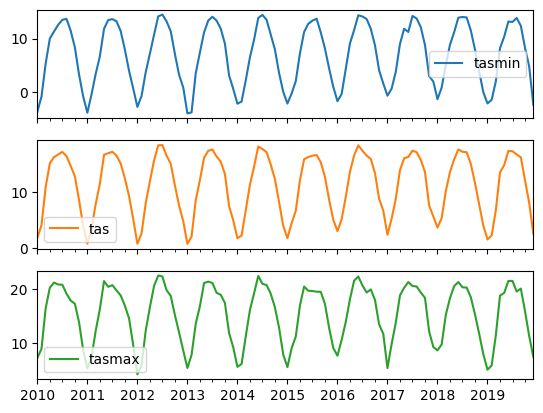

In [ ]:
df_big.plot(subplots=True)

In [ ]:
len(l_min)


120

In [ ]:
df_big.to_csv('shimla_temp_data.csv')

In [ ]:
s1=pd.date_range(start='2010-01-01',end='2019-12-01',freq='MS')
s2=pd.Series(l_min)
df_min = pd.DataFrame({data_repres[typ]: l_min},index=s1)
l_df.append(df_min)

,tasmin
2010-01-01,1.775000
2010-02-01,4.050000
2010-03-01,10.875000
2010-04-01,15.100000
2010-05-01,16.200000
...,...
2019-08-01,16.675001
2019-09-01,16.175000
2019-10-01,12.050000
2019-11-01,8.050000


In [ ]:
df1.iloc[i+64800,]

IndexError: ignored

In [ ]:
df1.iloc[175975:,].head(10)

,time,lon,lat,tasmin
175975,2019-03-01,77.5,25.5,15.875001
175976,2019-03-01,77.5,26.5,15.625001
175977,2019-03-01,77.5,27.5,15.175000
175978,2019-03-01,77.5,28.5,14.700001
175979,2019-03-01,77.5,29.5,13.575001
175980,2019-03-01,77.5,30.5,11.075001
175981,2019-03-01,77.5,31.5,2.000000
175982,2019-03-01,77.5,32.5,-9.600000
175983,2019-03-01,77.5,33.5,-11.925000
175984,2019-03-01,77.5,34.5,-11.200001


In [ ]:
df_temp=pd.read_csv('shimla_temp_data.csv',index_col=[0],parse_dates=True)
df_temp

,tasmin,tas,tasmax
2010-01-01,-3.700000,1.775000,7.275001
2010-02-01,-0.850000,4.050000,9.000000
2010-03-01,5.350000,10.875000,16.449999
2010-04-01,10.025001,15.100000,20.225000
2010-05-01,11.325000,16.200000,21.150000
...,...,...,...
2019-08-01,13.875001,16.675001,19.500000
2019-09-01,12.400000,16.175000,20.050000
2019-10-01,8.275000,12.050000,15.900001
2019-11-01,4.800000,8.050000,11.325000


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df_temp.loc['2018-01-01']

tasmin   -1.350
tas       3.625
tasmax    8.675
Name: 2018-01-01 00:00:00, dtype: float64

In [ ]:
df_temp.loc['2019-01-01']

tasmin   -2.150
tas       1.500
tasmax    5.125
Name: 2019-01-01 00:00:00, dtype: float64

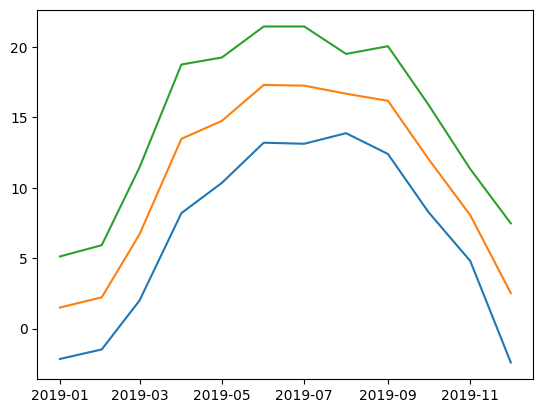

In [ ]:
plt.plot(df_temp.loc['2019'])